In [28]:
import matplotlib.pyplot as plt
plt.style.use('ggplot') 
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from xgboost import XGBRegressor
%matplotlib inline

In [29]:
train = pd.read_csv('/home/ariana/projetos/codenation/testfiles/train.csv')
test = pd.read_csv('/home/ariana/projetos/codenation/testfiles/test.csv')

In [30]:
train.dtypes

Unnamed: 0                  int64
NU_INSCRICAO               object
NU_ANO                      int64
CO_MUNICIPIO_RESIDENCIA     int64
NO_MUNICIPIO_RESIDENCIA    object
                            ...  
Q046                       object
Q047                       object
Q048                       object
Q049                       object
Q050                       object
Length: 167, dtype: object

In [31]:
train['NU_NOTA_MT'].describe()

count    10133.000000
mean       482.497928
std         99.826323
min          0.000000
25%        408.900000
50%        461.200000
75%        537.600000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

In [32]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
CO_UF_ENTIDADE_CERTIFICACAO,12092,0.880699
NO_ENTIDADE_CERTIFICACAO,12092,0.880699
SG_UF_ENTIDADE_CERTIFICACAO,12092,0.880699
Q041,10792,0.786016
TP_SIT_FUNC_ESC,9448,0.688128


In [33]:
aux = train.copy()
aux2 = train.copy()

aux = aux.loc[:, test.columns]
aux['NU_NOTA_MT'] = aux2.NU_NOTA_MT

c = aux.corr()
c.NU_NOTA_MT.sort_values()

TP_LINGUA                -0.201726
TP_COR_RACA              -0.157364
TP_ST_CONCLUSAO          -0.087869
TP_ENSINO                -0.086353
NU_IDADE                 -0.061485
TP_STATUS_REDACAO        -0.059376
TP_NACIONALIDADE         -0.034965
IN_TREINEIRO             -0.022287
IN_SABATISTA             -0.016459
IN_SURDEZ                -0.015249
IN_IDOSO                 -0.011336
IN_GESTANTE              -0.000945
IN_BAIXA_VISAO            0.000685
IN_DISLEXIA               0.001453
TP_PRESENCA_CN            0.003552
TP_PRESENCA_CH            0.003552
IN_DISCALCULIA            0.009813
TP_ANO_CONCLUIU           0.029039
TP_ESCOLA                 0.069304
CO_UF_RESIDENCIA          0.107493
NU_NOTA_COMP1             0.299402
NU_NOTA_COMP2             0.335638
NU_NOTA_COMP4             0.342282
NU_NOTA_COMP5             0.343337
NU_NOTA_COMP3             0.350307
TP_DEPENDENCIA_ADM_ESC    0.373233
NU_NOTA_REDACAO           0.379376
NU_NOTA_LC                0.494695
NU_NOTA_CH          

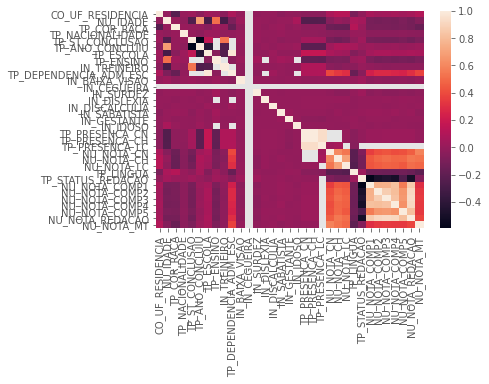

In [34]:
sns.heatmap(c, 
            xticklabels=c.columns.values,
            yticklabels=c.columns.values)

In [36]:
#Apenas as colunas que tem maior relação:
new_vector_training = [
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    'NU_NOTA_COMP3',
    'NU_NOTA_REDACAO',
    'NU_NOTA_LC',
    'NU_NOTA_CH',
    'NU_NOTA_CN',
    'NU_NOTA_MT'
]

new_vector_test = [
    'NU_INSCRICAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    'NU_NOTA_COMP3',
    'NU_NOTA_REDACAO',
    'NU_NOTA_LC',
    'NU_NOTA_CH',
    'NU_NOTA_CN'
]

train_data = train.copy()
train_data = train_data.loc[:, new_vector_training]
train_data.dropna(subset=['NU_NOTA_MT'], inplace=True)
train_data.head()

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_COMP3,NU_NOTA_REDACAO,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT
0,120.0,120.0,80.0,80.0,120.0,520.0,581.2,495.4,436.3,399.4
1,140.0,120.0,120.0,80.0,120.0,580.0,599.0,544.1,474.5,459.8
5,120.0,120.0,160.0,100.0,120.0,620.0,410.9,583.2,439.7,364.5
6,100.0,120.0,120.0,100.0,120.0,560.0,484.5,604.2,420.1,529.2
7,140.0,120.0,120.0,120.0,120.0,620.0,611.2,625.8,619.6,566.7


In [37]:
y = train_data.NU_NOTA_MT
X = train_data.drop(['NU_NOTA_MT'], axis=1)

validation = test.copy()
validation_1 = validation.loc[:, new_vector_test]
validation_2 = validation.loc[:, new_vector_test]

In [38]:
train_X, validation_X, train_y, validation_y = train_test_split(X, y, random_state = 0)

In [40]:
regressor = LinearRegression()
regressor.fit(train_X, train_y)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [12]:
validation_1.drop(['NU_INSCRICAO'], axis=1, inplace=True)

In [13]:
predicted_score = model.predict(validation_1)
final_df = pd.DataFrame({'NU_INSCRICAO': validation_2['NU_INSCRICAO'], 'NU_NOTA_MT': predicted_score})

In [14]:
final_df.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,422.304169
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,450.262909
2,b38a03232f43b11c9d0788abaf060f7366053b6d,576.919006
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,44.465439
4,715494628a50142ce8cb17191cfe6d0f3cae0934,547.173340


In [15]:
final_df['NU_NOTA_MT'].describe()

count    4576.000000
mean      368.280548
std       198.215591
min        20.014500
25%        56.806877
50%       442.708984
75%       481.361694
max       849.853149
Name: NU_NOTA_MT, dtype: float64

In [16]:
result_df = final_df.loc[: , ['NU_INSCRICAO', 'NU_NOTA_MT']]
result_df.to_csv('answer_5.csv', index=False)